<a href="https://colab.research.google.com/github/LeeYoungJun1113/Mynetwork/blob/main/P_Bone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/K

! unzip -qq "/content/drive/MyDrive/K/DICOM_2.zip"


/content/drive/MyDrive/K


In [2]:
!pip install pydicom
!pip install dicom
!pip install opencv-python
!pip install natsort
!pip install simpleitk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 KB 40.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 33.4 MB/s eta 0:00:00


In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import cv2, pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut 
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from natsort import natsorted

import tensorflow as tf

import sys
import random
import warnings
warnings.filterwarnings('ignore')

import cv2 
import os
from PIL import Image
import PIL
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import nibabel as nib
import SimpleITK as sitk



from pylab import rcParams

from tensorflow.keras.callbacks import Callback
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import  Conv2D,  MaxPooling2D, GlobalMaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import concatenate, add
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import backend as K

In [ ]:
print(pydicom.read_file('/content/drive/MyDrive/Purdue/data/1/C0011391_00000.DCM'))

In [ ]:
print(pydicom.read_file('/content/drive/MyDrive/K/DICOM_2/Orig_2/1/1-001.dcm'))

In [ ]:
slice = pydicom.read_file('/content/drive/MyDrive/Purdue/data/1/C0011391_00000.DCM')
print(slice.pixel_array[1])

In [ ]:
slicee = pydicom.read_file('/content/drive/MyDrive/K/DICOM_2/Orig_2/1/1-001.dcm')
print(slicee.pixel_array[1])

In [103]:
filename = '/content/drive/MyDrive/Purdue/data/1/C0011391_00000.DCM'
filenamee = '/content/drive/MyDrive/Purdue/mask/1/IMG0001.dcm'
dcm = pydicom.dcmread(filename)
img = dcm.pixel_array
sex = dcm.PatientSex

img = img.resize((512,512))

ValueError: ignored

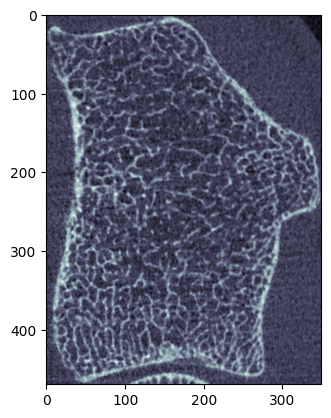

In [101]:
plt.imshow(img, cmap=plt.cm.bone)

In [ ]:
bone = pydicom.dcmread(bone_path[1])
print(bone)

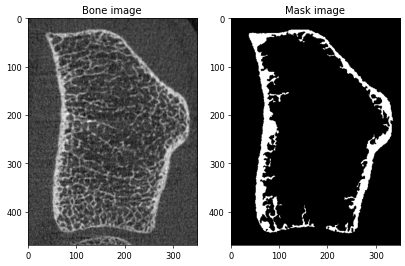

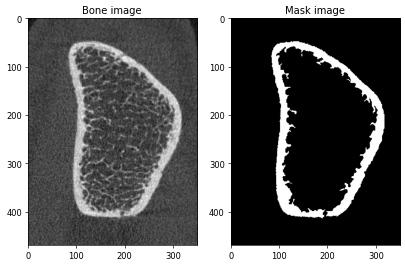

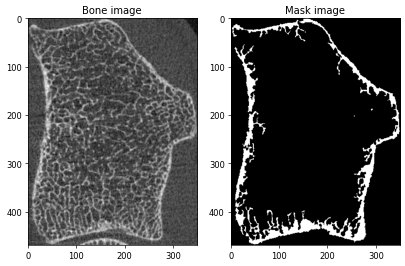

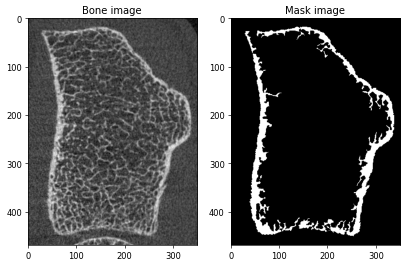

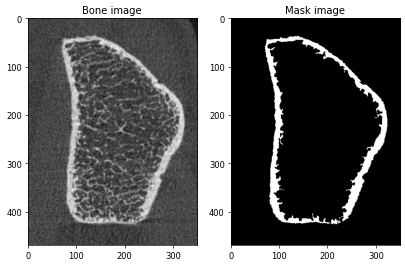

In [62]:
# Bone & Mask image path
bone_path = natsorted(glob('/content/drive/MyDrive/Purdue/data/1/*.DCM'))
mask_path = natsorted(glob('/content/drive/MyDrive/Purdue/mask/1/*.dcm'))

def bone_image(path):
  bone = pydicom.dcmread(path)
  bone = bone.pixel_array

  plt.figure(figsize=(8,8), dpi=60)
  plt.subplot(1,2,1)
  plt.title('Bone image')
  plt.imshow(bone, cmap= 'gray')
  
def mask_image(path):
  mask = pydicom.read_file(path)
  mask = mask.pixel_array

  plt.subplot(1,2,2)
  plt.title('Mask image')
  plt.imshow(mask, cmap= 'gray' )

rando = np.random.randint(0, len(bone_path), size=5)
for i in rando:
  bone_image(bone_path[i])
  mask_image(mask_path[i])


In [ ]:
# CT & Mask image path
bone_path = natsorted(glob('/content/drive/MyDrive/Purdue/data/1/*.DCM'))
mask_path = natsorted(glob('/content/drive/MyDrive/Purdue/mask/1/*.dcm'))

# graph function
def show_image(path):
    slice = pydicom.read_file(path)
    s = slice.RescaleSlope
    b = slice.RescaleIntercept
    image = s * slice.pixel_array + b

    plt.figure(figsize=(8, 8), dpi=60) 
    plt.subplot(1,3,1)
    plt.title('DICOM -> Array')
    plt.imshow(image, cmap = 'gray')

    # apply_modality_lut( ) & apply_voi_lut( )
    window_center = 40
    window_width = 400
    slice.WindowCenter = window_center
    slice.WindowWidth = window_width
    image = apply_modality_lut(image, slice)
    image2 = apply_voi_lut(image, slice)
    plt.subplot(1,3,2)
    plt.title('apply_voi_lut( )')
    plt.imshow(image2, cmap = 'gray')  

    # normalization
    image3 = np.clip(image, window_center - (window_width / 2), window_center + (window_width / 2))

    # plt.show()​
    plt.subplot(1,3,3)
    plt.title('normalize')
    plt.imshow(image3, cmap = 'gray')

# index = 70
# show_image(ct_path[index])
# show_image(mask_path[115-index])

rando = np.random.randint(0, len(bone_path), size=3)
for i in rando:
  show_image(bone_path[i])
  show_image(mask_path[i])

# def bone_image(path):
#   bone = pydicom.read_file(path)

#   plt.figure(figsize=(8,8), dpi=60)
#   plt.subplot(1,2,1)
#   plt.title('Bone image')
#   plt.imshow(image, camp= 'gray')
  
# def mask_image(path):
#   mask = pydicom.read_file(path)
  
#   plt.subplot(1,2,2)
#   plt.title('Mask image')
#   plt.imshow(mask, camp= 'gray' )

# rando = np.random.randint(0, len(bone_path), size=3)
# for i in rando:
#   bone_image(bone_path[i])
#   mask_image(mask_path[i])

# for index in [70,71]:
#     show_image(ct_path[index])
#     show_image(mask_path[115-index])

# for i in zip(glob.glob(ct_path), glob.glob(mask_path)):
#   show image()
# # for ct, mask in zip(glob.glob(ct_path), glob.glob(mask_path)):
#     show_image(ct)
#     show_image(mask)

In [67]:
# Load Image Data [Lung]
# Convert to np array

bones = []
masks = []
img_size = 512
bone_path_dir = '/content/drive/MyDrive/Purdue/data/1'
mask_path_dir = '/content/drive/MyDrive/Purdue/mask/1'
for i in range(1):
    file_bone_path = natsorted(glob(os.path.join(bone_path_dir, '*.DCM')))
    for j in range(len(file_bone_path)):
      bone = pydicom.read_file(file_bone_path[j])
      bone = bone.pixel_array
      
      bones.append(bone)
      
for i in range(1):
    file_mask_path = natsorted(glob(os.path.join(mask_path_dir, '*.dcm')))
    for j in range(len(file_mask_path)):
      mask = pydicom.read_file(file_mask_path[j])
      mask = mask.pixel_array
      
      masks.append(mask)

In [105]:
bones = np.array(bones)
bones = bones.reshape(len(bones), 470, 350, 1)

masks = np.array(masks)
masks = masks.reshape(len(masks), 470, 350, 1)

In [106]:
print(bones.dtype, masks.dtype)

int16 int16


In [72]:
print(bones.shape, masks.shape)

(168, 470, 350, 1) (168, 470, 350, 1)


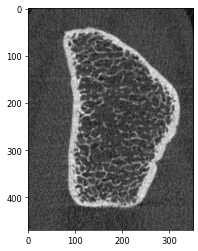

In [97]:
plt.figure(dpi=60)
plt.imshow(bones[130].reshape(470,350), cmap='gray')

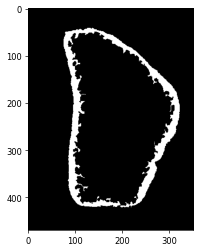

In [96]:
plt.figure(dpi = 60)
plt.imshow(masks[130].reshape(470,350), cmap='gray')

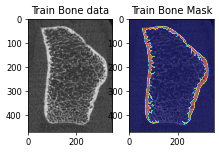

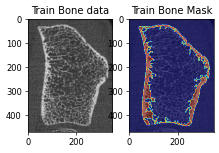

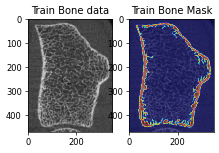

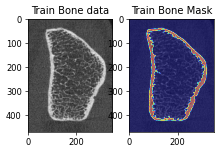

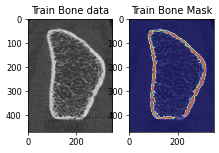

In [90]:
# Bone
def plot_sample(array_list, color_map = 'gray'):

  fig = plt.figure(figsize = (4,4), dpi=60)

  plt.subplot(1,2,1)
  plt.imshow(array_list[0].reshape(470,350), cmap='gray')
  plt.title('Train Bone data')

  plt.subplot(1,2,2)
  plt.imshow(array_list[0].reshape(470,350), cmap='gray')
  plt.imshow(array_list[1].reshape(470,350), alpha=0.5, cmap='jet')
  plt.title('Train Bone Mask')
  plt.show()

rando = np.random.randint(0, len(bones), size=5)
for i in rando:
  plot_sample([bones[i], masks[i]])

#  for i in [50,60,70,80]:
#   plot_sample([cts[i], masks[i]])

In [ ]:
# # Load Image Data
# # Convert to np array

cts = []
masks = []

cts = sitk.GetArrayFromImage(sitk.ReadImage('/content/drive/MyDrive/Purdue/data/1/*.DCM'))
cts = np.array(cts).astype('uint8')
cts = cts.reshape(len(cts), 470, 350, 1) 

masks = sitk.GetArrayFromImage(sitk.ReadImage('/content/drive/MyDrive/Purdue/mask/1/*.dcm'))
masks = np.array(masks).astype('uint8')
masks = cts.reshape(len(masks), 470, 350, 1) 


In [ ]:
# # Load target label

# y_label = []

# for i in range(0, len(masks)):
#   if len(np.unique(masks[i]))!=1:
#     y_label.append(1)
#   else:
#     y_label.append(0)
# print(y_label.count(0), y_label.count(1))

# y_label = np.array(y_label)

In [91]:
# Building unet model

def u_model(input_layer, start_neurons, DropoutRatio = 0.25):

    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(DropoutRatio)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation='relu', padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(DropoutRatio)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(DropoutRatio)(pool3)

    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(DropoutRatio)(pool4)

    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)
    
    
    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = BatchNormalization()(uconv4)
    
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    
    
    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])    
    uconv3 = BatchNormalization()(uconv3)
    
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = BatchNormalization()(uconv2)
        
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    
    
    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = BatchNormalization()(uconv1)
    
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
    
    output_layer = Conv2D(1, (1,1), activation="sigmoid")(uconv1)
    
    return output_layer

In [ ]:
# Another model

from tensorflow.keras.applications.resnet import ResNet50
#input = Input(shape=(img_size, img_size, 3))
model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(470,350,3))

In [92]:
# Define Metrics
def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    loss = 1 - dice_coef(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = 0.5*K.binary_crossentropy(y_true, y_pred) + 0.5*dice_loss(y_true, y_pred)
    return loss

# def dice_loss(y_true, y_pred):
#   y_true = tf.cast(y_true, tf.float32)
#   y_pred = tf.math.sigmoid(y_pred)
#   numerator = 2 * tf.reduce_sum(y_true * y_pred)
#   denominator = tf.reduce_sum(y_true + y_pred)

#   return 1 - numerator / denominator

In [ ]:
import math
class CosineAnnealingScheduler(Callback):
    """Cosine annealing scheduler.
    """

    def __init__(self, T_max, eta_max, eta_min=0, verbose=1):
        super(CosineAnnealingScheduler, self).__init__()
        self.T_max = T_max
        self.eta_max = eta_max
        self.eta_min = eta_min
        self.verbose = verbose

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = self.eta_min + (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * epoch / self.T_max)) / 2
        K.set_value(self.model.optimizer.lr, lr)
        print('\nEpoch %05d: CosineAnnealingScheduler setting learning ''rate to %s.' % (epoch + 1, lr))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

cosine_annealer = CosineAnnealingScheduler(T_max=7, eta_max=0.0003, eta_min=0.00003)

In [114]:
# Training Model_Lung

print(bones.shape, masks.shape)
# bones = bones/255.
# masks = masks/255.

x_train, x_valid, y_train, y_valid = train_test_split(bones, masks, test_size=0.2, random_state=42)
print(x_train.shape, x_valid.shape)

epochs = 10
batch_size = 8

# initialize this model
inputs = Input((470, 350, 1))
output_layer = u_model(inputs, 32, 0.25)

# Define callbacks to save model with best val_dice_coef
filename = '/content/drive/MyDrive/Purdue/Bone_model_0404.h5'
checkpointer = ModelCheckpoint(filepath = filename, monitor='val_dice_coef', verbose=1, save_best_only=True, mode='max')
#earlystopping = EarlyStopping(monitor='val_loss', patience=5)
model = Model(inputs=[inputs], outputs=[output_layer])
model.compile(optimizer=Adam(lr = 1e-5), loss= 'binary_crossentropy', metrics=[dice_coef])

results = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid),callbacks=[checkpointer])
# model.save('my_model')

(168, 470, 350, 1) (168, 470, 350, 1)
(134, 470, 350, 1) (34, 470, 350, 1)


ValueError: ignored

In [ ]:
# Training Model_liver

print(livs.shape, lmasks.shape)
print(livs.dtype, lmasks.dtype)
# livs = livs/255.
# lmasks = lmasks/255.

x_train, x_valid, y_train, y_valid = train_test_split(livs, lmasks, test_size=0.2, random_state=42)
print(x_train.shape, x_valid.shape)

epochs = 100
batch_size = 8

# initialize this model
inputs = Input((img_size, img_size, 1))
output_layer = u_model(inputs, 32, 0.25)

# Define callbacks to save model with best val_dice_coef
filename = '/content/drive/MyDrive/K/livers_model_0222.h5'
checkpointer = ModelCheckpoint(filepath = filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#earlystopping = EarlyStopping(monitor='val_loss', patience=5)
model = Model(inputs=[inputs], outputs=[output_layer])
model.compile(optimizer=Adam(learning_rate = 1e-5), loss= 'binary_crossentropy', metrics=[dice_coef])

results = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid),callbacks=[checkpointer])
# model.save('my_model')

In [ ]:
model.save('/content/drive/MyDrive/seg/model_0101.h5')

In [ ]:
# Evaluate the trained model 
score = model.evaluate(x_valid, y_valid, batch_size=batch_size)
print("test loss, test dice coefficient:", score)

12/12 [==============================] - 0s 32ms/step - loss: 0.0080 - dice_coef: 0.9719
test loss, test dice coefficient: [0.007957958616316319, 0.9718573689460754]


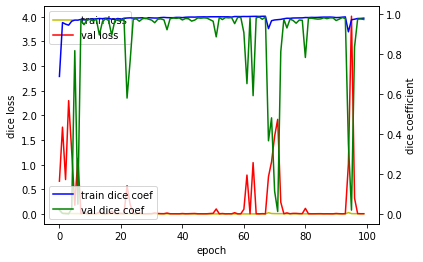

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(results.history['loss'], 'y', label='train loss')
loss_ax.plot(results.history['val_loss'], 'r', label='val loss')

acc_ax.plot(results.history['dice_coef'], 'b', label='train dice coef')
acc_ax.plot(results.history['val_dice_coef'], 'g', label='val dice coef')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('dice loss')
acc_ax.set_ylabel('dice coefficient')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# Visualize the results

def compare_actual_and_predicted(image_no):
  temp = model.predict(x_valid[image_no].reshape(1, img_size, img_size, 1))

  fig = plt.figure(figsize=(8,8))

  plt.subplot(1,3,1)
  plt.imshow(x_valid[image_no].reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Original Image (CT)')

  plt.subplot(1,3,2)
  plt.imshow(y_valid[image_no].reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('True mask')

  plt.subplot(1,3,3)
  plt.imshow(temp.reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Predicted mask')

  plt.show()

1/1 [==============================] - 1s 709ms/step


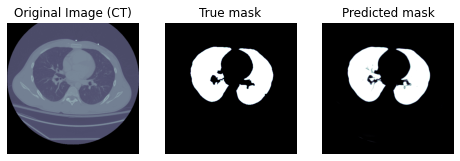

1/1 [==============================] - 0s 25ms/step


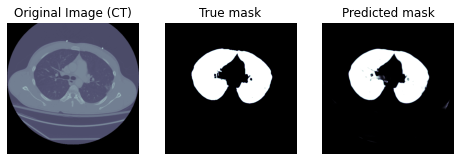

1/1 [==============================] - 0s 27ms/step


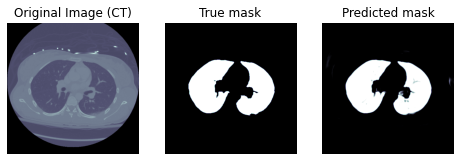

1/1 [==============================] - 0s 25ms/step


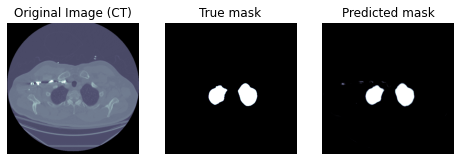

1/1 [==============================] - 0s 24ms/step


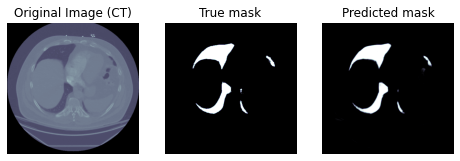

1/1 [==============================] - 0s 25ms/step


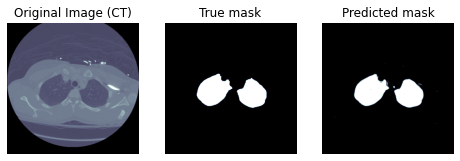

1/1 [==============================] - 0s 25ms/step


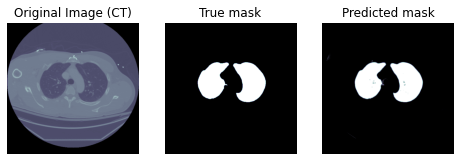

1/1 [==============================] - 0s 25ms/step


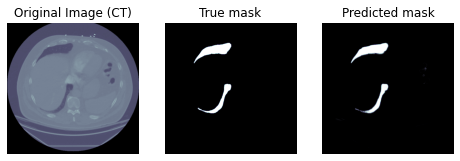

1/1 [==============================] - 0s 25ms/step


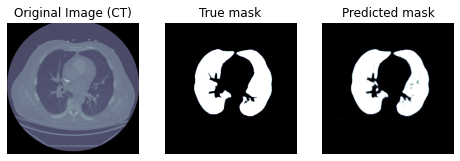

1/1 [==============================] - 0s 25ms/step


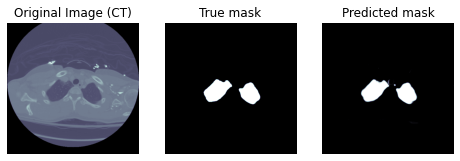

In [ ]:
rand = np.random.randint(0, len(x_valid), size=10)
for i in rand:
  compare_actual_and_predicted(i)

**ROC, ACU curve**

In [ ]:
from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = y_valid.ravel() # we want to make them into vectors
score_value = x_valid.ravel()/255.0 # we want to make them into vectors
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)

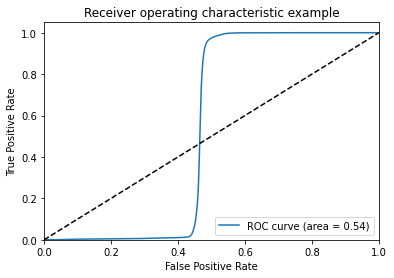

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [ ]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
# Check the new model's architecture

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

#Continue to train with the latest model


In [ ]:
dependencies = {'dice_coef': dice_coef}

In [ ]:
# Continue to train with the latest model [Lung]

filepath = '/content/drive/MyDrive/K/livers_model_0222.h5'
new_model = load_model(filepath, custom_objects=dependencies)


model = new_model

x_train, x_valid, y_train, y_valid = train_test_split(cts, masks, test_size=0.2, random_state=42)
print(x_train.shape, x_valid.shape)

epochs = 130
batch_size = 8

# # initialize this model
# inputs = Input((img_size, img_size, 1))
# output_layer = u_model(inputs, 32, 0.25)

filename = '/content/drive/MyDrive/K/livers_model_0222_2.h5'
checkpointer = ModelCheckpoint(filepath = filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.compile(optimizer=Adam(lr = 1e-5), loss='binary_crossentropy', metrics=[dice_coef])
results2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid),callbacks=[checkpointer])
score = model.evaluate(x_valid, y_valid, batch_size=batch_size)

print("test loss, test dice coefficient:", score)

In [ ]:
# Continue to train with the latest model [Liver]

filepath = '/content/drive/MyDrive/K/livers_model_0222_2.h5'
new_model = load_model(filepath, custom_objects=dependencies)


model = new_model

x_train, x_valid, y_train, y_valid = train_test_split(livs, lmasks, test_size=0.2, random_state=42)
print(x_train.shape, x_valid.shape)

epochs = 50
batch_size = 8

# # initialize this model
# inputs = Input((img_size, img_size, 1))
# output_layer = u_model(inputs, 32, 0.25)

filename = '/content/drive/MyDrive/K/livers_model_0222_3.h5'
checkpointer = ModelCheckpoint(filepath = filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.compile(optimizer=Adam(lr = 1e-5), loss='binary_crossentropy', metrics=[dice_coef])
results2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid),callbacks=[checkpointer])
score = model.evaluate(x_valid, y_valid, batch_size=batch_size)

print("test loss, test dice coefficient:", score)

In [ ]:
score = model.evaluate(x_valid, y_valid, batch_size=batch_size)
print("test loss, test dice coefficient:", score)

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(results2.history['loss'], 'y', label='train loss')
loss_ax.plot(results2.history['val_loss'], 'r', label='val loss')

acc_ax.plot(results2.history['dice_coef'], 'b', label='train dice coef')
acc_ax.plot(results2.history['val_dice_coef'], 'g', label='val dice coef')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('dice loss')
acc_ax.set_ylabel('dice coefficient')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = y_valid.ravel() # we want to make them into vectors
score_value = x_valid.ravel()/255.0 # we want to make them into vectors
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

In [ ]:
blank_infections = []
for i in range(0, len(y_valid[:])):
  if np.unique(y_valid[i]).size == 1:
    blank_infections.append(i)
print("Number of complete black masks :" , len(blank_infections))

for index in sorted(blank_infections, reverse = True):  
    del y_valid[index]  
    del x_valid[index]

In [ ]:
sorted(blank_infections, reverse = True)

In [ ]:
# Visualize the results

def compare_actual_and_predicted(image_no):
  temp = model.predict(x_valid[image_no].reshape(1, img_size, img_size, 1))

  fig = plt.figure(figsize=(6,6))

  plt.subplot(1,3,1)
  plt.imshow(x_valid[image_no].reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Original Image (CT)')

  plt.subplot(1,3,2)
  plt.imshow(y_valid[image_no].reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('True mask')

  plt.subplot(1,3,3)
  plt.imshow(temp.reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Predicted mask')

  plt.show()

In [ ]:
rand = np.random.randint(0, len(x_valid), size=10)
for i in rand:
  compare_actual_and_predicted(i)

## **MODEL INFERENCE**

In [ ]:
dependencies = {'dice_coef': dice_coef}

filepath = '/content/drive/MyDrive/K/Lung_model_0223.h5'
new_model = load_model(filepath, custom_objects=dependencies)

In [ ]:
#### Model Inference

# Prepare testset 
x_test = []
tmasks = []
img_size = 512
test_path_dir = '/content/drive/MyDrive/K/DICOM_2/Orig_2/99'
tmask_path_dir = '/content/drive/MyDrive/K/DICOM_2/Lung_2/99'
for i in range(1):
    file_test_path = natsorted(glob(os.path.join(test_path_dir, '*.dcm')))
    for j in range(len(file_test_path)):
      slice = pydicom.read_file(file_test_path[j])
      s = int(slice.RescaleSlope)
      b = int(slice.RescaleIntercept)
      image = s * slice.pixel_array + b
      
      x_test.append(image)

for i in range(1):
    file_tmask_path = natsorted(glob(os.path.join(tmask_path_dir, '*.dcm')))
    for j in range(len(file_tmask_path)):
      m_slice = pydicom.read_file(file_tmask_path[j])
      ss = int(m_slice.RescaleSlope)
      bb = int(m_slice.RescaleIntercept)
      m_image = ss * m_slice.pixel_array + bb
      
      tmasks.append(m_image)      

In [ ]:
file_tmask_path

In [ ]:
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test), img_size, img_size, 1)

tmasks = np.array(tmasks)
tmasks = tmasks[::-1]
tmasks = tmasks.reshape(len(tmasks), img_size, img_size, 1)

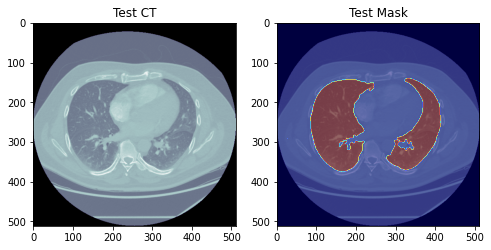

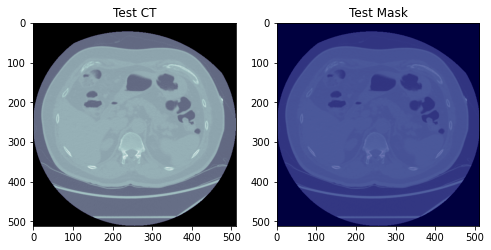

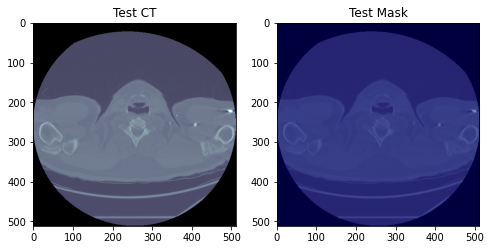

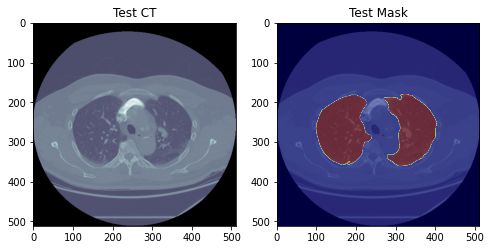

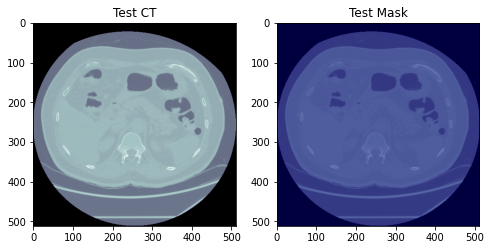

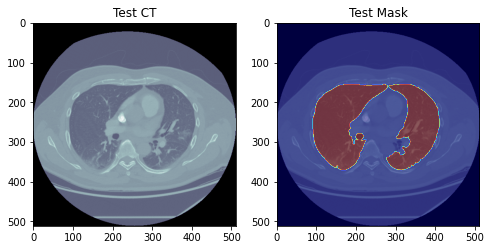

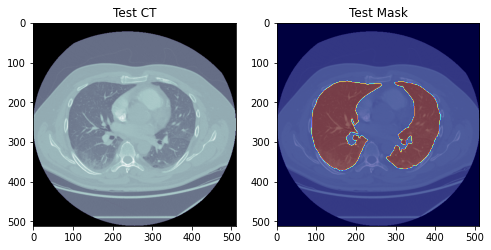

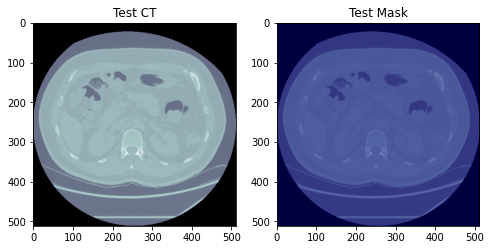

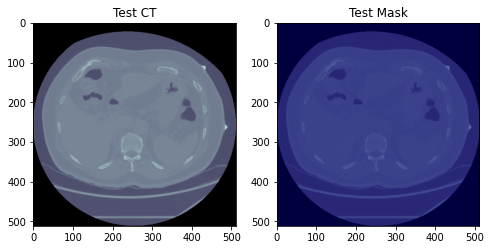

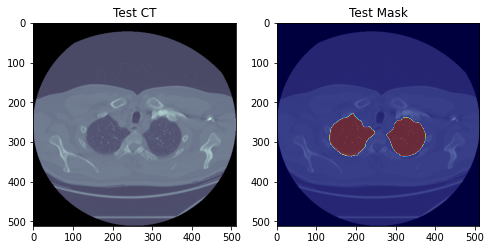

In [ ]:
def plot_sample_test(array_list, color_map = 'gray'):

  fig = plt.figure(figsize = (8,8))

  plt.subplot(1,2,1)
  plt.imshow(array_list[0].reshape(512,512), cmap='bone')
  plt.title('Test CT')

  plt.subplot(1,2,2)
  plt.imshow(array_list[0].reshape(512,512), cmap='bone')
  plt.imshow(array_list[1].reshape(512,512), alpha=0.5, cmap='jet')
  plt.title('Test Mask')
  plt.show()

rando = np.random.randint(0, len(x_test), size=10)
for i in rando:
  plot_sample_test([x_test[i], tmasks[i]])

In [ ]:
# Visualize the results

def compare_actual_and_predicted_test(image_no):
  temp = new_model.predict(x_test[image_no].reshape(1, img_size, img_size, 1))

  fig = plt.figure(figsize=(8,8))

  plt.subplot(1,3,1)
  plt.imshow(x_test[image_no].reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Test Image (CT)')

  plt.subplot(1,3,2)
  plt.imshow(tmasks[image_no].reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Test masks (CT)')

  plt.subplot(1,3,3)
  plt.imshow(temp.reshape(img_size, img_size), cmap='bone')
  plt.axis('off')
  plt.title('Test Prediction')

  plt.show()

1/1 [==============================] - 0s 28ms/step


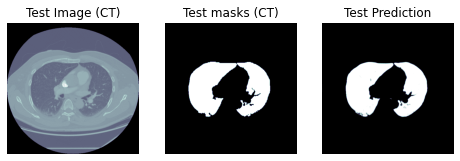

1/1 [==============================] - 0s 24ms/step


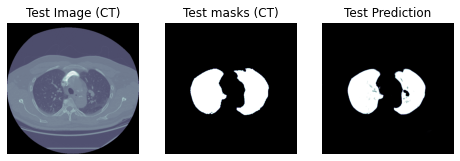

1/1 [==============================] - 0s 25ms/step


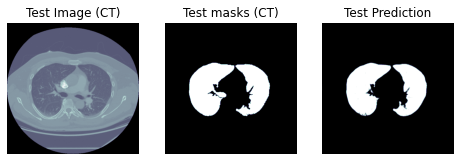

1/1 [==============================] - 0s 26ms/step


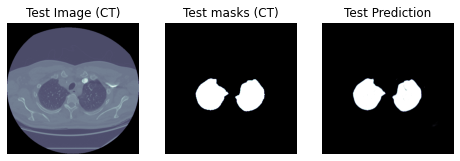

1/1 [==============================] - 0s 26ms/step


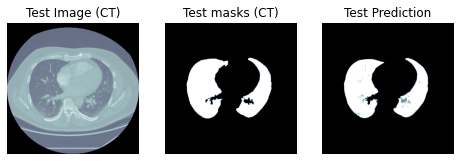

1/1 [==============================] - 0s 26ms/step


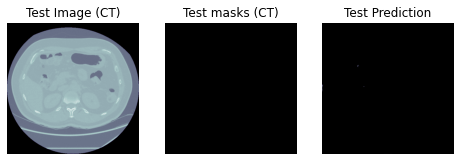

1/1 [==============================] - 0s 25ms/step


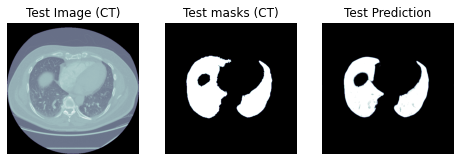

1/1 [==============================] - 0s 25ms/step


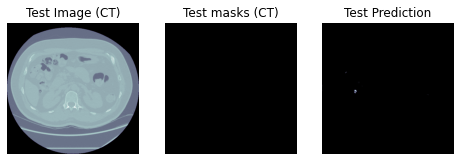

1/1 [==============================] - 0s 27ms/step


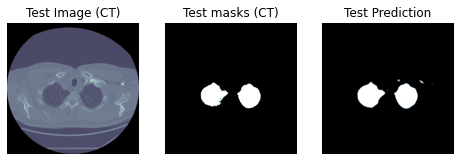

1/1 [==============================] - 0s 26ms/step


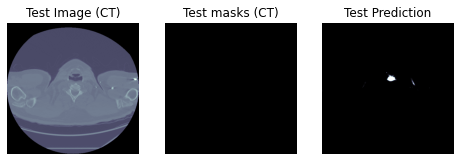

In [ ]:
rand = np.random.randint(0, len(x_test), size=10)
for i in rand:
  compare_actual_and_predicted_test(i)

In [ ]:
score = new_model.evaluate(x_test, tmasks, batch_size=batch_size)
print("test loss, test dice coefficient:", score)

15/15 [==============================] - 0s 31ms/step - loss: 0.0176 - dice_coef: 0.6769
test loss, test dice coefficient: [0.017627215012907982, 0.6769353747367859]


In [ ]:
from sklearn.metrics import roc_curve, auc # roc curve tools
ground_truth_labels = tmasks.ravel() # we want to make them into vectors
score_value = x_test.ravel()/255.0 # we want to make them into vectors
fpr, tpr, _ = roc_curve(ground_truth_labels,score_value)
roc_auc = auc(fpr,tpr)

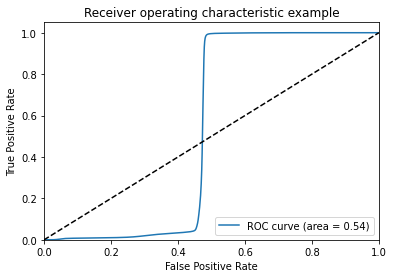

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

# Evaluation of Classification Performance

In [ ]:
x_valid = x_valid[:].astype(int)

In [ ]:
temp = model.predict(x_valid[:])

3/3 [==============================] - 0s 102ms/step


In [ ]:
print(temp)

In [ ]:
print(x_valid)

In [ ]:
temp_label = temp.argmax(axis=1)

In [ ]:
temp_label

In [ ]:
temp = np.where(temp>0.5, 1, 0)

In [ ]:
# x_valid = x_valid.argmax(axis=1)
x_valid = np.where(x_valid>0.5, 1, 0)

In [ ]:
print(temp.shape, x_valid.shape)

(96, 512, 512, 1) (96, 512, 512, 1)


In [ ]:
x_valid.dtype

In [ ]:
temp_label

In [ ]:
print(temp.dtype, x_valid.dtype)

int64 int16


CONFUSION MATRIX

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(x_valid, temp))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(x_valid, temp_label)